# Random Forest Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv'
df = pd.read_csv(url)

In [3]:
df.info()
#12 cols, 891 rows
#Name, sex, cabin and embarked are probably categorical
#Hay nulls en age, cabin y embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C


In [5]:
df['PassengerId'].duplicated().sum()
#Checking for duplicates
#There are 0 duplicates

0

In [6]:
drop_cols = ['PassengerId','Cabin', 'Ticket', 'Name']
df.drop(drop_cols, axis = 1, inplace = True)
#Drop irrelevant cols

In [7]:
X = df.drop("Survived",axis=1)
y = df["Survived"]
#Selecting features and target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Split dataset

In [9]:
df_train = pd.concat([X_train, y_train], axis=1)
#Concatenate train datasets

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       572 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [11]:
df_train.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
379,3,male,19.0,0,0,7.7750,S,0
73,3,male,26.0,1,0,14.4542,C,0
757,2,male,18.0,0,0,11.5000,S,0
330,3,female,NaN,2,0,23.2500,Q,1
844,3,male,17.0,0,0,8.6625,S,0
26,3,male,NaN,0,0,7.2250,C,0
440,2,female,45.0,1,1,26.2500,S,1
841,2,male,16.0,0,0,10.5000,S,0
869,3,male,4.0,1,1,11.1333,S,1
220,3,male,16.0,0,0,8.0500,S,1


In [12]:
df_train.describe()
#Describe for numerical variables

,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,29.498846,0.553371,0.379213,32.586276,0.376404
std,0.824584,14.500059,1.176404,0.791669,51.969529,0.484824
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
df_train.describe(include='object')
#Describe for categorical variables

,Sex,Embarked
count,712,710
unique,2,3
top,male,S
freq,467,525


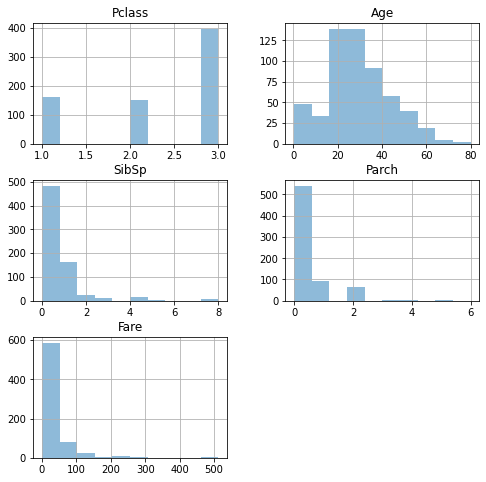

In [54]:
X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()
#Histogram

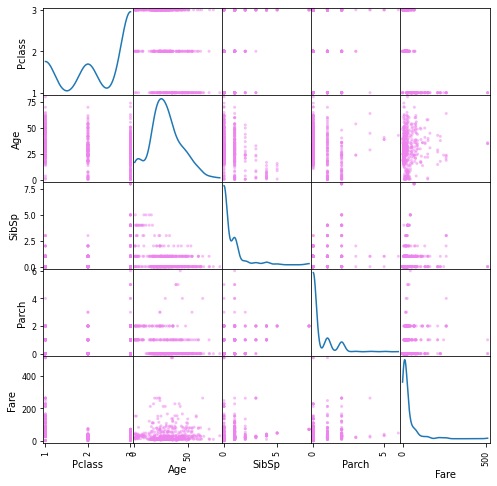

In [55]:
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()
#Scatter plot

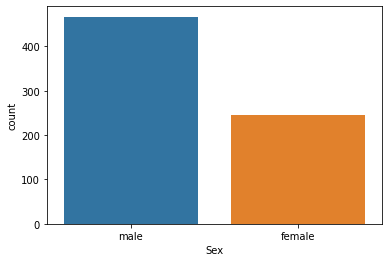

In [56]:
#Categorical analysis 
sns.countplot(data=X_train, x='Sex')
plt.show()

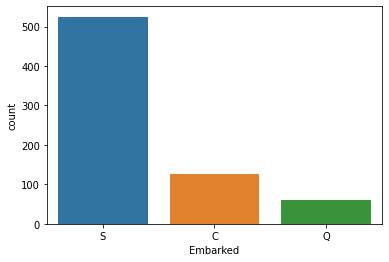

In [57]:
sns.countplot(data=X_train, x='Embarked')
plt.show()

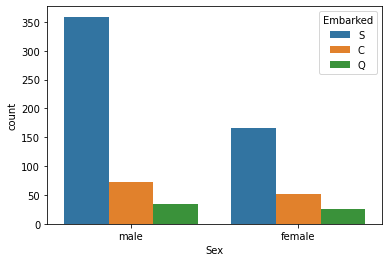

In [58]:
sns.countplot(data=X_train, x='Sex', hue='Embarked')
plt.show()

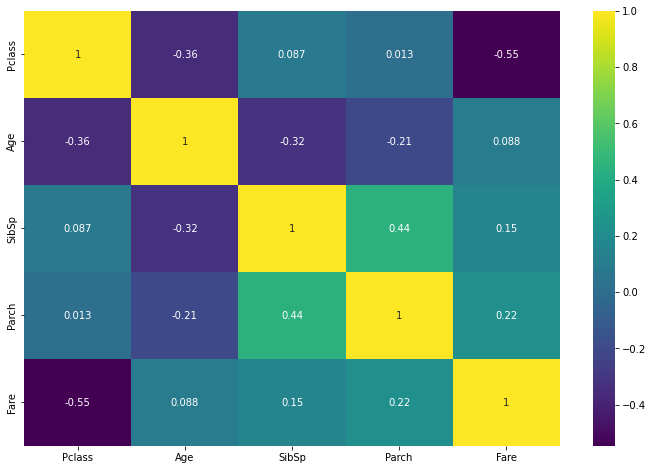

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')
plt.show()
#Correlation matrix
#Pclass y fare están correlacionadas negativamente porque a clases más bajas numéricamente (por ejemplo, primera clase)
#las tarifas son más altas
#Pclass también está relacionada con survived, hay más probabilidades de sobrevivir siendo de clase 1

In [14]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
X_test['Age'].fillna(X_train['Age'].mean(), inplace=True)
#Fill missing values in age with mean

In [15]:
X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)
X_test['Fare'].fillna(X_train['Fare'].median(), inplace=True)
#Fill missing values in fare with median

In [16]:
X_train[['Sex','Embarked']]=X_train[['Sex','Embarked']].astype('category')
X_test[['Sex','Embarked']]=X_test[['Sex','Embarked']].astype('category')

X_train['Sex']=X_train['Sex'].cat.codes
X_train['Embarked']=X_train['Embarked'].cat.codes
X_test['Sex']=X_test['Sex'].cat.codes
X_test['Embarked']=X_test['Embarked'].cat.codes
#Encoding categ variables


In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
#Fit a Decision Tree model as comparison

0.7932960893854749

In [18]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=1107)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy_score(y_test, y_pred2)
#Fit a Random Forest model
#Compared to decision tree, accuracy goes up around 4%

0.8100558659217877

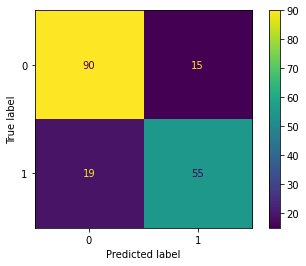

In [19]:
cm = confusion_matrix(y_test, y_pred2, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
display_labels = clf2.classes_)
disp.plot()
plt.show()

#90 TP = predicted positive and it’s true.
#55 TN = predicted negative and it’s true.
#15 FP = predicted positive and it’s false.
#19 FN = predicted negative and it’s false.

In [20]:
print(classification_report(y_test,y_pred2))
#Precision: from all the positive classes, how many we predicted correctly (0.83)
#Recall: from all the classes we have predicted as positive, how many are actually positive (0.86)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [21]:
print(clf2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1107, 'verbose': 0, 'warm_start': False}


In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5)]
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


#On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 5 * 12 * 3 * 3 * 2 = 1080 settings

{'n_estimators': [50, 162, 275, 387, 500], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
rf_cl = RandomForestClassifier(random_state=1107) #Base model
rf_cl_cv = RandomizedSearchCV(estimator = rf_cl, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1107, n_jobs = -1) #Random search

In [24]:
rf_cl_cv.fit(X_train,y_train) #Fit the random search model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 162, 275, 387,
                                                         500]},
                   random_state=1107, verbose=2)

In [25]:
rf_cl_cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

In [26]:
#Con los mejores parámetros estimo modelo
rf_ht = RandomForestClassifier(random_state=1107, n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=50, bootstrap=True)
rf_ht.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=10, n_estimators=50,
                       random_state=1107)

In [27]:
y_pred_rf = rf_ht.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred_rf))
#Precision 0.83, recall 0.90 (mejoró el recall)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [29]:
filename = '../models/final_model.sav'
pickle.dump(rf_ht, open(filename, 'wb'))

# Boosting Algorithms Project

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
y_xgb_pred = xgb.predict(X_test)

In [34]:
accuracy_score(y_test, y_xgb_pred)
0.8100558659217877

0.8100558659217877

In [40]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [35]:
#Grid search
xgb_2 = XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid_xgb = RandomizedSearchCV(xgb_2,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eta': [0.05, 0.1, 0.15, 0.2, 0.25,
                                                0.3],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_log_loss')

In [36]:
xgb_2 = grid_xgb.best_estimator_

In [37]:
y_pred_xgb_2 = xgb_2.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred_xgb_2)
#El accuracy score aumenta respecto al xgb sin grid search y el random forest

0.8156424581005587

In [39]:
print(classification_report(y_test, y_pred_xgb_2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

